# **Import data**


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

In [2]:
training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
submit = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# **Combine train data and test data.**

In [3]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])
all_data.reset_index(inplace=True, drop=True)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1



# **Exploratory data analysis**


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,train_test,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.0,0.0
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.0,NaN
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.0,NaN
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,NaN
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.0,NaN
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.0,NaN
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,0.0,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,0.0,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


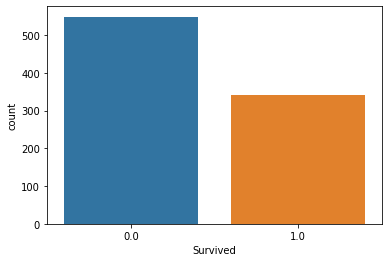

In [6]:
sns.countplot(all_data['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

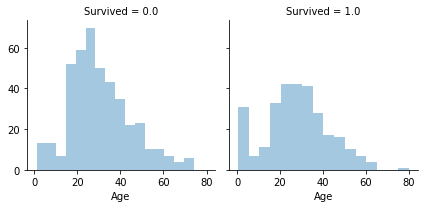

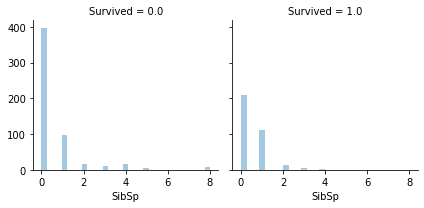

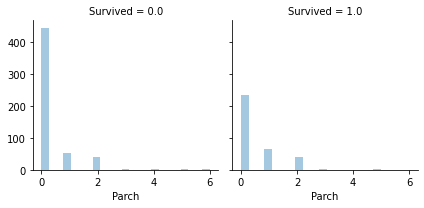

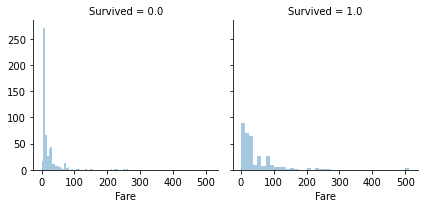

In [7]:
df_num = ['Age','SibSp','Parch','Fare']
df_cat = ['Pclass','Sex','Embarked']

for i in range(len(df_num)):
  g = sns.FacetGrid(all_data, col='Survived')
  g.map (sns.distplot, df_num[i], kde=False)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


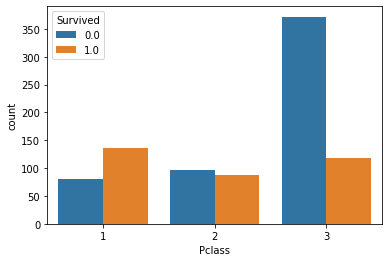

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


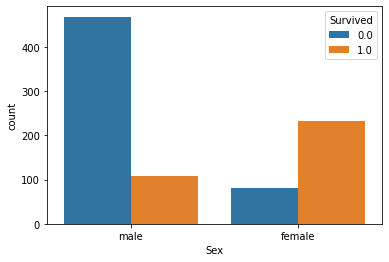

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


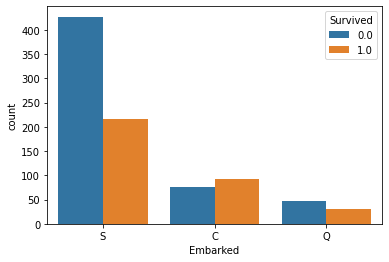

In [ ]:
for i in range(len(df_cat)):
  sns.countplot(all_data[df_cat[i]], hue=all_data['Survived'])
  plt.show()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.038354 -0.338481  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.077221 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224 -0.035322  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.081629  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.257307 -0.558629  0.178740  0.160238  0.221539   
train_test     -0.807510       NaN  0.023988 -0.018528  0.033867 -0.005793   

                 Fare  train_test  
PassengerId  0.031428   -0.807510  
Survived     0.257307         NaN  
Pclass      -0.558629    0.023988  
Age          0.178740   -0.018528  
SibSp        0.160238    0.033867  
Parch        0.221539   -0.005793  
Fare         1.000000   -0.030831  
train_tes

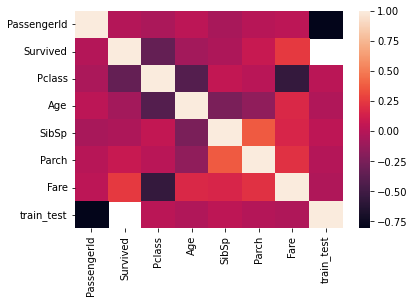

In [ ]:
print(all_data.corr())
sns.heatmap(all_data.corr())

# **Data clean and Feature engineering**

In [ ]:
# name_title
all_data['Name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [ ]:
all_data['Name_title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Name_title, dtype: int64

In [ ]:
# ticket(head)
all_data['Ticket_info'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 'no')
all_data['Ticket_info'].value_counts()

no           961
pc            92
ca            68
a5            28
sotonoq       24
stono2        21
scparis       19
wc            15
a4            10
fcc            9
soc            8
c              8
sopp           7
pp             4
scah           4
wep            4
fc             3
sotono2        3
sca4           2
swpp           2
ppp            2
sc             2
casoton        1
lp             1
a2             1
aq4            1
stonoq         1
sca3           1
sop            1
fa             1
scahbasle      1
as             1
sp             1
scow           1
aq3            1
Name: Ticket_info, dtype: int64

In [ ]:
all_data['Cabin_hd'] = all_data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'no')
all_data['Cabin_hd'].value_counts()

no    1014
C       94
B       65
D       46
E       41
A       22
F       21
G        5
T        1
Name: Cabin_hd, dtype: int64

In [ ]:
all_data.dropna(subset=['Embarked'],inplace = True)
all_data.Age = all_data.Age.fillna(train.Age.mean())
all_data.Fare = all_data.Fare.fillna(train.Fare.mean())
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Cabin        293 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1307 non-null   int64  
 13  Name_title   1307 non-null   object 
 14  Ticket_info  1307 non-null   object 
 15  Cabin_hd     1307 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 173.6+ KB


In [ ]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Name_title,Ticket_info,Cabin_hd
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,Mr,a5,no
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,Mrs,pc,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,stono2,no
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,Mrs,no,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,Mr,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,S,0,Mr,a5,no
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,0,Dona,pc,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr,sotonoq,no
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,S,0,Mr,no,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

for i in all_data[['Sex','Embarked','Name_title','Ticket_info','Cabin_hd']]:
  all_data[i]=LabelEncoder().fit_transform(all_data[i])

all_data[['Age','SibSp','Parch','Fare']]= StandardScaler().fit_transform(all_data[['Age','SibSp','Parch','Fare']])
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Name_title,Ticket_info,Cabin_hd
0,1,0.0,3,"Braund, Mr. Owen Harris",1,-0.607808,0.480272,-0.445407,A/5 21171,-0.502126,NaN,2,1,12,2,8
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.636788,0.480272,-0.445407,PC 17599,0.735797,C85,0,1,13,14,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,-0.296659,-0.479537,-0.445407,STON/O2. 3101282,-0.489077,NaN,2,1,9,30,8
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.403426,0.480272,-0.445407,113803,0.384269,C123,2,1,13,13,2
4,5,0.0,3,"Allen, Mr. William Henry",1,0.403426,-0.479537,-0.445407,373450,-0.486660,NaN,2,1,12,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,-0.008915,-0.479537,-0.445407,A.5. 3236,-0.486660,NaN,2,0,12,2,8
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,0.714575,-0.479537,-0.445407,PC 17758,1.463022,C105,0,0,3,14,2
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,0.675681,-0.479537,-0.445407,SOTON/O.Q. 3101262,-0.502126,NaN,2,0,12,28,8
1307,1308,NaN,3,"Ware, Mr. Frederick",1,-0.008915,-0.479537,-0.445407,359309,-0.486660,NaN,2,0,12,13,8


In [ ]:
all_data = all_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','train_test','Name_title','Ticket_info','Cabin_hd']]
X_train = all_data[all_data['train_test'] == 1].drop(['train_test','Survived'], axis=1)
X_test = all_data[all_data['train_test'] == 0].drop(['train_test','Survived'], axis=1)
y_train = all_data[all_data['train_test'] == 1].Survived
X_train 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title,Ticket_info,Cabin_hd
0,3,1,-0.607808,0.480272,-0.445407,-0.502126,2,12,2,8
1,1,0,0.636788,0.480272,-0.445407,0.735797,0,13,14,2
2,3,0,-0.296659,-0.479537,-0.445407,-0.489077,2,9,30,8
3,1,0,0.403426,0.480272,-0.445407,0.384269,2,13,13,2
4,3,1,0.403426,-0.479537,-0.445407,-0.486660,2,12,13,8
...,...,...,...,...,...,...,...,...,...,...
886,2,1,-0.218872,-0.479537,-0.445407,-0.390965,2,15,13,8
887,1,0,-0.841169,-0.479537,-0.445407,-0.062312,2,9,13,1
888,3,0,-0.008915,0.480272,1.864701,-0.188940,2,9,33,8
889,1,1,-0.296659,-0.479537,-0.445407,-0.062312,0,12,13,2


# **Basic Model Building**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
lr = LogisticRegression(max_iter = 2000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
svm = SVC(probability = True)
knn = KNeighborsClassifier()
gnb = GaussianNB()
per = Perceptron()

models = [ lr, dt, rf, xgb, lgb, svm, knn, gnb, per]

for i in models:
  scores = cross_val_score(i, X_train, y_train, cv=5, scoring='accuracy')
  print(i)
  print(scores)
  print(scores.mean())
  print("-"*100)


LogisticRegression(max_iter=2000)
[0.78651685 0.76966292 0.78651685 0.76966292 0.8079096 ]
0.7840538310163143
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier(random_state=42)
[0.73595506 0.76966292 0.80337079 0.76404494 0.82485876]
0.7795784929854632
----------------------------------------------------------------------------------------------------
RandomForestClassifier(random_state=42)
[0.81460674 0.78089888 0.85393258 0.75280899 0.86440678]
0.8133307941344505
----------------------------------------------------------------------------------------------------
XGBClassifier(random_state=42)
[0.81460674 0.8258427  0.83146067 0.79213483 0.84745763]
0.8223005141877738
----------------------------------------------------------------------------------------------------
LGBMClassifier(random_state=42)
[0.8258427  0.82022472 0.85955056 0.80337079 0.84180791]
0.8301593347298928
---------------------------------------

# **Optimize Model**

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
def clf_performance(model_abbr, param_grid, model_name):
    clf = GridSearchCV(model_abbr, param_grid, cv = 5, verbose = True, n_jobs = -1)
    best_clf = clf.fit(X_train, y_train)
    print(model_name)
    print('Score: ' + str(best_clf.best_score_))
    print('Parameters: ' + str(best_clf.best_params_))

In [ ]:
lr = LogisticRegression()
param_grid_lr = {'max_iter' : [1000],
        'penalty' : ['l1', 'l2'],
        'solver' : ['liblinear']}

clf_performance(lr, param_grid_lr, 'Logistic Regression')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Logistic Regression
Score: 0.7896908525360248
Parameters: {'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors' : [3,5,7,9],
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
        'p' : [1,2]}

clf_performance(knn, param_grid_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Score: 0.8144226496540341
Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [ ]:
svm = SVC(probability = True)
param_grid_svm = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.5, 1],'C': [1, 10, 100]},
                   {'kernel': ['linear'], 'C': [1, 10, 100]},
                   {'kernel': ['poly'], 'degree' : [3,4,5], 'C': [1, 10, 100]}]
clf_performance(svm, param_grid_svm, 'SVM')

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [ ]:
rf = RandomForestClassifier(random_state = 42)

param_grid_rf = {
    'n_estimators': [300,500,800,1000],
    'criterion':['gini','entropy'],
    'min_samples_leaf': [1,5,10],
    'min_samples_split': [1,5,10]}

clf_performance(rf, param_grid_rf, 'RandomForest')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
RandomForest
Score: 0.8346727607439852
Parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


In [ ]:
xgb = XGBClassifier(random_state = 42)

param_grid_xgb = {
    'n_estimators': [500, 800, 1000],
    'gamma':[0.5, 1 ,2],
    'max_depth': [5, 10, 15],
    'subsample': [0.3, 0.5, 0.7],
    'colsample_bytree':[0.3, 0.5, 0.7],
    'learning_rate': [0.3, 0.5, 0.7],
    }
clf_performance(xgb, param_grid_xgb, 'XGBoost')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBoost
Score: 0.8414143337776931
Parameters: {'colsample_bytree': 0.7, 'gamma': 2, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.5}


In [ ]:
lgb = LGBMClassifier(random_state = 42)

param_grid_lgb = {
    'n_estimators':[300,500,800,1000],
    'min_gain_to_split':[0.5, 1 ,2],
    'max_depth':[5, 10, 15],
    'bagging_fraction': [0.3, 0.5, 0.7],
    'feature_fraction':[0.3, 0.5, 0.7],
    'learning_rate': [0.3, 0.5, 0.7],}
    
clf_performance(lgb, param_grid_lgb, 'LightGBM')

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
LightGBM
Score: 0.8414333777693137
Parameters: {'bagging_fraction': 0.3, 'feature_fraction': 0.7, 'learning_rate': 0.5, 'max_depth': 15, 'min_gain_to_split': 0.5, 'n_estimators': 300}


# **Adjust the parameters slightly.**

In [ ]:
# xgb = XGBClassifier(colsample_bytree= 0.7, 
#             gamma = 2, 
#             learning_rate = 0.3, 
#             max_depth = 5, 
#             n_estimators = 800, 
#             subsample = 0.5,
#             random_state=1,
#             n_jobs=-1,)
# xgb.fit(X_train,y_train)
# xgb_res = xgb.predict(X_test)
# submit['Survived'] = xgb_res
# submit['Survived'] = submit['Survived'].astype(int)
# submit.to_csv('xgb1_submit.csv', index= False)

In [ ]:
# rf = RandomForestClassifier(criterion='gini',
#                   n_estimators=1000,
#                   min_samples_split=12,
#                   min_samples_leaf=1,
#                   oob_score=True,
#                   random_state=1,
#                   n_jobs=-1) 
# rf.fit(X_train,y_train)
# rf_res = rf.predict(X_test)
# submit['Survived'] = rf_res
# submit['Survived'] = submit['Survived'].astype(int)
# submit.to_csv('rf_submit.csv', index= False)

In [ ]:
lgb = LGBMClassifier(random_state = 42,
            bagging_fraction= 0.3, 
            feature_fraction= 0.7, 
            learning_rate= 0.5, 
            max_depth= 15, 
            min_gain_to_split= 0.5, 
            n_estimators= 300 )
scores = cross_val_score(lgb, X_train, y_train, cv=5, scoring='accuracy')
print(i)
print(scores)
print(scores.mean())

Perceptron()
[0.8258427  0.81460674 0.88202247 0.80898876 0.87570621]
0.8414333777693137


In [ ]:
lgb = LGBMClassifier(random_state = 42,
            num_leaves = 1000,
            bagging_fraction= 0.3, 
            feature_fraction= 0.7, 
            learning_rate= 0.5, 
            max_depth= 10, 
            min_gain_to_split= 0.5, 
            n_estimators= 300 )
scores = cross_val_score(lgb, X_train, y_train, cv=5, scoring='accuracy')
print(i)
print(scores)
print(scores.mean())

Perceptron()
[0.80898876 0.83146067 0.84269663 0.80898876 0.86440678]
0.8313083222243384
